In [6]:
import sys
sys.path.insert(1, 'D:\Master\Blok3\AAS') #add path of toolbox

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, optimize, interpolate
from matplotlib.ticker import MaxNLocator
#custom modules
import importlib as il
from toolbox import as_toolbox as ast
from toolbox import vis
from toolbox import fits
from iminuit import Minuit
from toolbox.ExternalFunctions import UnbinnedLH

## 0 

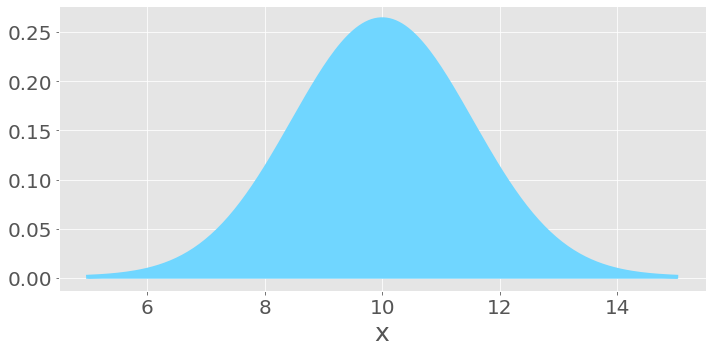

(<AxesSubplot:xlabel='x'>, <Figure size 720x360 with 1 Axes>)

In [8]:
x = np.linspace(5,15,200)
y = stats.norm.pdf(x, 10, np.sqrt(2.3))
color = vis.Color_palette(1)[0]
vis.nice_plot(
    x, y, save_plot=True, figname='Gauss.pdf', color=color,
    linewidth=4, fill_under_curve=True, fill_color=color)

# Generate MC/ find MLE 

## function 

In [470]:
alpha_real, beta_real = .9, .55 
xmin, xmax = -1.02, 1.11
def func_pdf(x, alpha = alpha_real, beta = beta_real): 
    return (1 + alpha*x + beta*x**2)/(xmax + 1/2*alpha*xmax**2 
                                      + 1/3*beta*xmax**3 
                                      - xmin - 1/2*alpha*xmin**2 
                                      - 1/3*beta*xmin**3)
ymax = func_pdf(xmax, alpha_real, beta_real)
xaxis = np.linspace(xmin,xmax,100)
yaxis = func_pdf(xaxis, alpha_real, beta_real)

In [471]:
#generate points
N_f = 807
ymax = func_pdf(xmax, alpha_real, beta_real) 
x_rand = ast.accept_reject(func_pdf, N_f, xmin, xmax, ymax)

In [472]:
#perform the fit using unbinned log likelihood
ullh_f = UnbinnedLH(func_pdf, x_rand)
f_minuit = Minuit(ullh_f,  pedantic=False, print_level=1)
f_minuit.migrad();       # This is where the minimisation is carried out!
alpha_fit, beta_fit = f_minuit.args
sig_alpha, sig_beta = f_minuit.errors['alpha'], f_minuit.errors['beta'] 

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 513.6                      │         Nfcn = 49 (49 total)         │
│ EDM = 4.95e-07 (Goal: 0.0001)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


In [465]:
alpha_fit, beta_fit, sig_alpha, sig_beta

(0.9349710712127468,
 0.6326426542266165,
 0.08845058751864762,
 0.157635343343681)

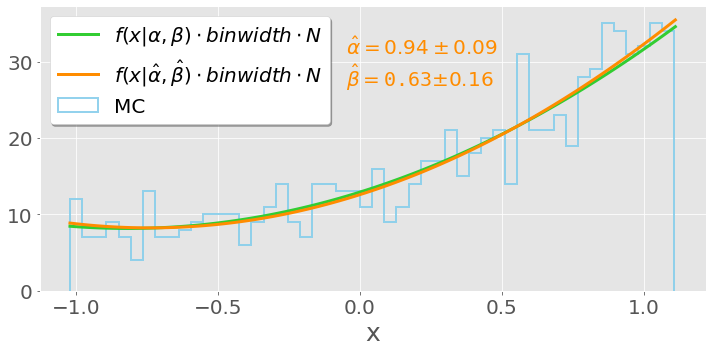

In [479]:
#show results
colors = vis.Color_palette(1)
n_bins = 50
binwidth = (xmax-xmin)/n_bins
yaxis = func_pdf(xaxis, alpha_real, beta_real)*binwidth*N_f

fig, ax = plt.subplots(figsize = (10,5))
_, _, _, fig, ax = vis.nice_histogram(
    x_rand, n_bins, axis = ax, figure = fig, show_plot = False, plot_errors=False, plot_hist=True, 
    data_label_hist = 'MC', plot_legend = True, color_hist = 'skyblue')
ax, fig = vis.nice_plot(
    xaxis, yaxis, axis = ax, figure = fig, show_plot=False,
    color = 'limegreen', data_label = r'$f(x| \alpha, \beta)\cdot binwidth \cdot N$')
ax, fig = vis.nice_plot(
        xaxis, func_pdf(xaxis, alpha_fit, beta_fit)*N_f*binwidth, axis = ax, figure = fig, 
        show_plot=False,color = 'darkorange', data_label = r'$f(x| \hat\alpha, \hat\beta)\cdot binwidth \cdot N$',
        plot_legend=True)
text = r'$\hat\alpha = 0.94 \pm 0.09$'+'\n' + r'$\hat\beta= $'+ '{:4.2}'.format(beta_fit)+'$\pm 0.16$'
ax.text(.46, .9, text, fontsize=20,  family='monospace', 
                    transform=ax.transAxes, color='darkorange', verticalalignment='top', horizontalalignment ='left')
fig.tight_layout()
fig.savefig('Figures/Polynomial.pdf')
fig

In [437]:
a_file = open("pdf_quadr.txt", "w")
np.savetxt(a_file, x_rand)
a_file.close()

## Poisson 

In [438]:
N = 513
mu_real = 3.8
x_poisson = stats.poisson.rvs(mu = mu_real, size = N, random_state = 4) #generate values
x_poisson = x_poisson.astype(int)
n_bins = 40
bins = np.arange(-.5,x_poisson.max()+.5)#shift bins
def poisson(x,mu): return stats.poisson.pmf(x, mu)

In [480]:
#perform fit
ullh = ast.UNLLH(poisson, x_poisson) #This should be minimized
poisson_minuit = Minuit(ullh, mu = 5, pedantic=False, print_level=1)
poisson_minuit.migrad();       # This is where the minimisation is carried out!
mu_fit = float(poisson_minuit.args[0])
sig_mu = poisson_minuit.errors['mu']

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1074                       │         Nfcn = 18 (18 total)         │
│ EDM = 1.85e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


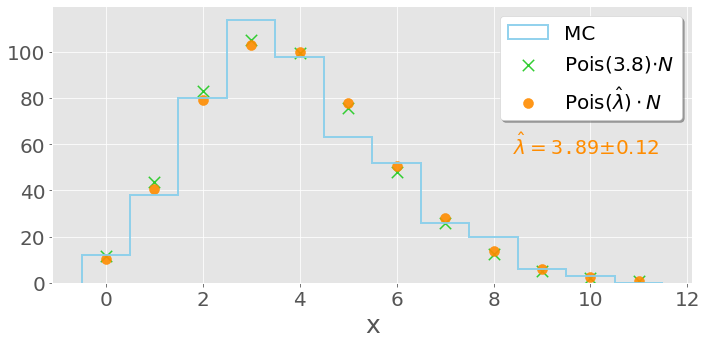

In [488]:
#show results
colors = vis.Color_palette(1)
xaxis = np.arange(12)
yaxis = stats.poisson.pmf(xaxis, mu = 3.8)*N
ax, fig = vis.nice_plot(
    xaxis, yaxis, show_plot=False, color = 'limegreen', data_label = 'Pois(3.8)' + r'$\cdot N$', scatter = True,
    scr_markersize=130, scr_markerstyle='x', figsize = (10,5))
x, y, binwidth, fig, ax = vis.nice_histogram(
    x_poisson, bins, axis = ax, figure = fig, show_plot = False, plot_errors=False, plot_hist=True, 
    data_label_hist = 'MC',plot_legend = True, color_hist = 'skyblue', histtype='step')
fit_label = 'Pois' + r'$(\hat\lambda)\cdot N$'
ax, fig= vis.nice_plot(
    xaxis, poisson(xaxis, mu_fit)*N*binwidth, axis = ax, figure = fig, show_plot = False, 
    data_label = fit_label, color = 'darkorange', scatter = True, scr_markersize=100, alpha=.9,plot_legend=True,
    figname = 'Poisson.png', save_plot = True)

text = r'$\hat\lambda = $'+ '{:4.3}'.format(mu_fit) + r'$\pm0.12$'
ax.text(.72, .55, text, fontsize=20,  family='monospace', 
                    transform=ax.transAxes, color='darkorange', verticalalignment='top', horizontalalignment ='left')
fig.tight_layout()
fig.savefig('Figures/Poisson.pdf')
fig

In [441]:
a_file = open("pmf_poisson.txt", "w")
x_poisson.astype(int)
np.savetxt(a_file, x_poisson,fmt='%.i')
a_file.close()

In [442]:
a_file = open("fitted_params.txt", "w")
a_file.write('alpha = '+f'{alpha_fit}' + '\n')
a_file.write('beta = '+f'{beta_fit}'+ '\n')
a_file.write('lambda = '+f'{mu_fit}'+ '\n')
a_file.close()

# Dark Matter 

In [81]:
from scipy import constants

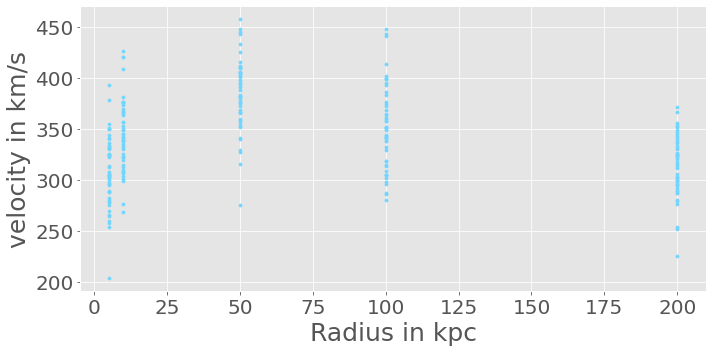

(<AxesSubplot:xlabel='Radius in kpc', ylabel='velocity in km/s'>,
 <Figure size 720x360 with 1 Axes>)

In [443]:
df = pd.read_csv('velocity_vs_radius.csv')
radii = df['r to center [kpc]']
vel = df['measured velocity [km/s]']

vis.nice_plot(radii, vel, scatter = True, color = colors[0], scr_markersize=10, xlabel='Radius in kpc',
             ylabel='velocity in km/s')

In [444]:
h_si = 4.629e20
radii_si = df['r to center [m]']
vel_si = df['measured velocity [m/s]']

radii_unique_si = np.unique(radii_si)
MNM = np.array([2.85e40, 3.838e40, 4.0e40, 4.0e40,4.0e40])
#linear interpolation between the points, although it doesnt matter since we only care about the nodes
f_MNM = interpolate.interp1d(radii_unique_si, MNM, kind = 'cubic') 
def f_MDM(r, mdm_tot): return mdm_tot * (np.log((h_si+r)/h_si) + h_si/(h_si+r) - 1)
def f_velocity(r, mdm_tot): 
    return np.sqrt(constants.G*(f_MDM(r, mdm_tot) + f_MNM(r))/r)

In [445]:
# plot for different total masses of dm
MDM_tot = np.array([0, 2e42, 1.4e43])
radii_arr = np.linspace(radii_si.min(), radii_si.max(), 200)
Velocity_pred =  [f_velocity(radii_arr, mdm) for mdm in MDM_tot]

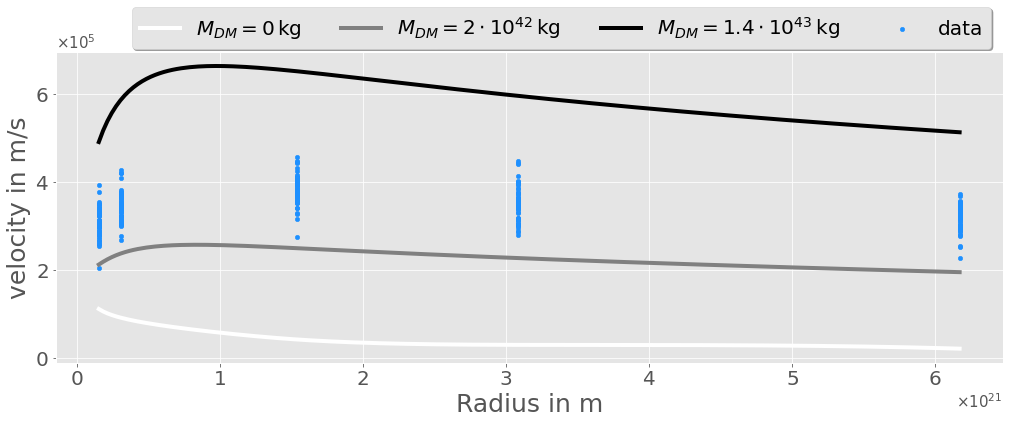

In [446]:
colors = vis.Color_palette(3)
radii_arr = np.linspace(radii_unique_si.min(), radii_unique_si.max(), 200)
ax, fig = vis.nice_plot(
    radii_si, vel_si, scatter = True, color = 'dodgerblue', scr_markersize=20,
    data_label='data', show_plot=False, figsize = (15,6), legend_loc=2)

ax, fig = vis.nice_plot(
    radii_arr, Velocity_pred[0], scatter = False, color = 'white', scr_markersize=90, xlabel='Radius in m',
    ylabel='velocity in m/s', data_label = '$M_{DM} = 0\,\mathrm{kg} $', plot_legend=True, show_plot = False,
    axis = ax, figure= fig, scr_markerstyle='x', linewidth=4)

ax, fig = vis.nice_plot(
    radii_arr, Velocity_pred[1], scatter = False, color = 'grey', scr_markersize=90, xlabel='Radius in m',
    ylabel='velocity in m/s', data_label = '$M_{DM} = 2\cdot 10^{42}\,\mathrm{kg} $', plot_legend=True, axis = ax, figure=fig, show_plot = False,
    scr_markerstyle='x', linewidth=4)

ax, fig = vis.nice_plot(
    radii_arr, Velocity_pred[2], scatter = False, color = 'k', scr_markersize=90, xlabel='Radius in m',
    ylabel='velocity in m/s', data_label = r'$M_{DM} = 1.4\cdot 10^{43}\,\mathrm{kg} $ ', plot_legend=True, axis = ax, figure=fig,
    show_plot = False, legend_loc=(.08,1.01), legend_ncol = 4, 
    legend_color=ax.get_facecolor(), scr_markerstyle='x', linewidth=4)


ax.ticklabel_format(axis='y', style='sci', scilimits=(2,3), useOffset=True, useLocale=None, useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(2,3), useOffset=True, useLocale=None, useMathText=True)
ax.get_yaxis().get_offset_text().set_size(15)
ax.get_xaxis().get_offset_text().set_size(15)
fig

In [447]:
#MLE using the data points without uncertainty, pdf is gaussian with mean being the 
#predicted velocity at each point and std is sig = .1*V
#sum 1/C * exp((d-mu_V(MDM))/sig)
#then use ML to estimate uncertainy on MDM
#to show that it is the best fit
def f_LLH(v_meas,r_meas, MDM): 
    MDM = np.tile(MDM, (v_meas.shape[0],1))
    v_pred = f_velocity(np.expand_dims(r_meas,1), MDM)
    llh = np.sum(np.log(stats.norm.pdf(np.expand_dims(v_meas,1), loc = v_pred, scale = 0.1*v_pred)), axis = 0)
    return llh

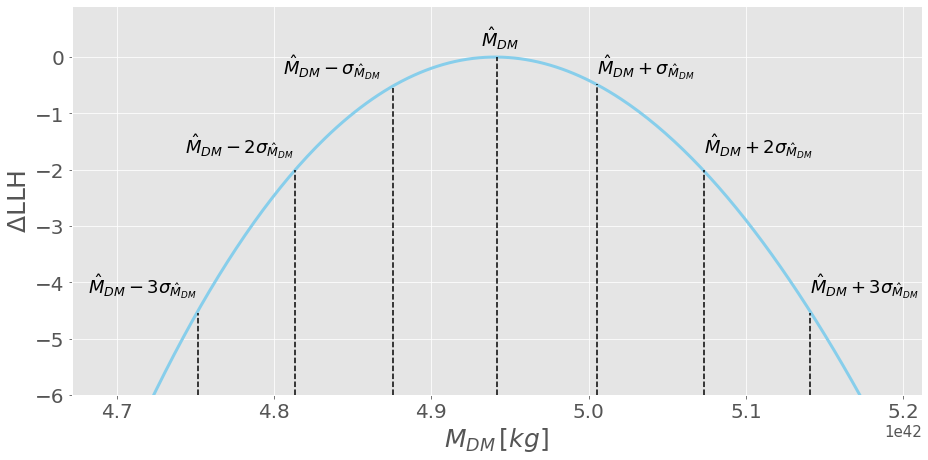

In [461]:
mdm_test = np.linspace(4.59e42, 5.34e42, 400)
LLH = f_LLH(vel_si, radii_si,mdm_test)
DLLH = LLH - LLH.max()
mdm_max = mdm_test[np.argmax(DLLH)] #get MLE MDM

#find 1sigma, 2s, 3s
#look at region smaller left from the maximum
mask_l = mdm_test<mdm_max
mdm_l = mdm_test[mask_l]
DLLH_l = DLLH[mask_l]
sig1m = mdm_l[np.argmin(np.abs(DLLH_l+.5))]
sig2m = mdm_l[np.argmin(np.abs(DLLH_l+2))]
sig3m = mdm_l[np.argmin(np.abs(DLLH_l+4.5))]


mask_r = mdm_test>mdm_max
mdm_r = mdm_test[mask_r]
DLLH_r = DLLH[mask_r]
sig1p = mdm_r[np.argmin(np.abs(DLLH_r+.5))]
sig2p = mdm_r[np.argmin(np.abs(DLLH_r+2))]
sig3p = mdm_r[np.argmin(np.abs(DLLH_r+4.5))]

#actual plot
ax, fig = vis.nice_plot(
    mdm_test, DLLH, x_show_range=  (mdm_max-.27e42, mdm_max+.27e42), y_range=(-6,.9), show_plot=False,
    xlabel=r'$M_{DM}\,[kg]$', ylabel=r'$\Delta \mathrm{LLH}$', figsize = (13,6.5))
ax.get_xaxis().get_offset_text().set_size(15)

ax.axvline(mdm_max, linestyle = '--', color = 'k',ymax =  .87)
ax.axvline(sig1m, linestyle = '--', color = 'k',ymax =  .84-.05)
ax.axvline(sig2m, linestyle = '--', color = 'k', ymax =  .58)
ax.axvline(sig3m, linestyle = '--', color = 'k', ymax =  .21)
ax.axvline(sig1p, linestyle = '--', color = 'k', ymax =  .8)
ax.axvline(sig2p, linestyle = '--', color = 'k',ymax =  .58)
ax.axvline(sig3p, linestyle = '--', color = 'k',ymax =  .21)
ax.text(s = r'$\hat{M}_{DM}$', x = mdm_max-.1e41, y = .2, fontsize = 18)
ax.text(s = r'$\hat{M}_{DM} - \sigma_{\hat{M}_{DM}}$', x = sig1m-.7e41, y = -.3, fontsize = 18)
ax.text(s = r'$\hat{M}_{DM} + \sigma_{\hat{M}_{DM}}$', x = sig1p, y = -.3, fontsize = 18)
ax.text(s = r'$\hat{M}_{DM} - 2\sigma_{\hat{M}_{DM}}$', x = sig2m-.7e41, y = -1.7, fontsize = 18)
ax.text(s = r'$\hat{M}_{DM} + 2\sigma_{\hat{M}_{DM}}$', x = sig2p, y = -1.7, fontsize = 18)
ax.text(s = r'$\hat{M}_{DM} - 3\sigma_{\hat{M}_{DM}}$', x = sig3m-.7e41, y = -4.2, fontsize = 18)
ax.text(s = r'$\hat{M}_{DM} + 3\sigma_{\hat{M}_{DM}}$', x = sig3p, y = -4.2, fontsize = 18)

fig.tight_layout()
fig.savefig('Figures/DLLH.pdf')
fig

In [449]:
mdm_max, mdm_max - sig1m, sig1p-mdm_max, mdm_max - sig2m, sig2p-mdm_max, mdm_max - sig3m, sig3p-mdm_max

(4.9415037593984965e+42,
 6.578947368421088e+40,
 6.390977443609046e+40,
 1.278195488721803e+41,
 1.3157894736842114e+41,
 1.8984962406015035e+41,
 1.992481203007518e+41)

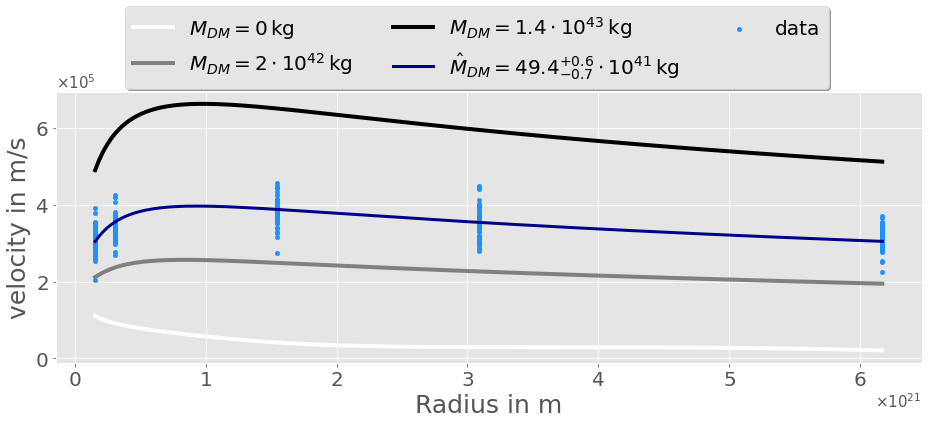

In [460]:
colors = vis.Color_palette(3)
colors2 = vis.Color_palette(1)
radii_arr = np.linspace(radii_unique_si.min(), radii_unique_si.max(), 200)
ax, fig = vis.nice_plot(
    radii_si, vel_si, scatter = True, color = 'dodgerblue', scr_markersize=20,
    data_label='data', show_plot=False, figsize = (13,6), legend_loc=2)

ax, fig = vis.nice_plot(
    radii_arr, Velocity_pred[0], scatter = False, color = 'white', scr_markersize=90, xlabel='Radius in m',
    ylabel='velocity in m/s', data_label = '$M_{DM} = 0\,\mathrm{kg} $', plot_legend=True, show_plot = False,
    axis = ax, figure= fig, scr_markerstyle='x', linewidth=4)

ax, fig = vis.nice_plot(
    radii_arr, Velocity_pred[1], scatter = False, color = 'grey', scr_markersize=90, xlabel='Radius in m',
    ylabel='velocity in m/s', data_label = '$M_{DM} = 2\cdot 10^{42}\,\mathrm{kg} $', plot_legend=True, axis = ax, figure=fig, show_plot = False,
    scr_markerstyle='x', linewidth=4)

ax, fig = vis.nice_plot(
    radii_arr, Velocity_pred[2], scatter = False, color = 'k', scr_markersize=90, xlabel='Radius in m',
    ylabel='velocity in m/s', data_label = r'$M_{DM} = 1.4\cdot 10^{43}\,\mathrm{kg} $ ', plot_legend=True, axis = ax, figure=fig,
    show_plot = False, legend_loc=(.08,1.01), legend_ncol = 4, 
    legend_color=ax.get_facecolor(), scr_markerstyle='x', linewidth=4)


ax.ticklabel_format(axis='y', style='sci', scilimits=(2,3), useOffset=True, useLocale=None, useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(2,3), useOffset=True, useLocale=None, useMathText=True)
ax.get_yaxis().get_offset_text().set_size(15)
ax.get_xaxis().get_offset_text().set_size(15)

ax, fig = vis.nice_plot(
    radii_arr, f_velocity(radii_arr, mdm_test[np.argmax(LLH)] ), scatter = False, color = 'darkblue', 
    scr_markersize=90, xlabel='Radius in m', ylabel='velocity in m/s', 
    data_label = '$\hat{M}_{DM} = 49.4^{+0.6}_{-0.7} \cdot 10^{41}\,\mathrm{kg} $', plot_legend=True, axis = ax, 
    figure=fig, show_plot = False, legend_loc=(.08,1.01), legend_ncol = 3, 
    legend_color=ax.get_facecolor(), scr_markerstyle='x', linewidth=3)


ax.ticklabel_format(axis='y', style='sci', scilimits=(2,3), useOffset=True, useLocale=None, useMathText=True)
ax.ticklabel_format(axis='x', style='sci', scilimits=(2,3), useOffset=True, useLocale=None, useMathText=True)
ax.get_yaxis().get_offset_text().set_size(15)
ax.get_xaxis().get_offset_text().set_size(15)
fig.tight_layout()
fig.savefig('Figures/v_vs_r.pdf')

fig

# Pace maker 

## 3a 

In [451]:
data = {'Produced': [.35, .15, .05, .20, .25], 'Defect': [.02, .04, .10, .035, .031]}
df = pd.DataFrame(data, index = np.array(['A1', 'A2', 'A3', 'A4', 'A5']))
df['Prob Defect %'] = df['Defect']*df['Produced']*100
df['Prob not Defect %'] = (1-df['Defect'])*df['Produced']*100
df

,Produced,Defect,Prob Defect %,Prob not Defect %
A1,0.35,0.020,0.700,34.300
A2,0.15,0.040,0.600,14.400
A3,0.05,0.100,0.500,4.500
A4,0.20,0.035,0.700,19.300
A5,0.25,0.031,0.775,24.225


In [452]:
df['Prob Defect %'].sum() + df['Prob not Defect %'].sum()

100.0

We determine the probability of P(A2|D) using Bayes theorem $\newline$
P(D): sum all the probabilities of having a defect product up$\newline$
P(A2) = 0.15 $\newline$
P(D|A2) = 0.04

### 3a1

In [453]:
P_D = df['Prob Defect %'].sum()
P_A2 = df['Produced']['A2']
P_D_A2 = df['Defect']['A2']
P_A2_D = P_D_A2*P_A2/P_D*100#factor 100 missing
print('The probability of a pm being from A2 given that it is defective is: ', P_A2_D)

The probability of a pm being from A2 given that it is defective is:  0.18320610687022904


If a pm is defective it is most likely from:

### 3a2 

In [454]:
df['Prob Defect %'].idxmax()

'A5'

In [455]:
P_Ai = df['Produced']
P_D_Ai = df['Defect']
P_A_D = P_D_Ai*P_Ai/np.sum(P_D_Ai*P_Ai)
P_A_D #confirmed

A1    0.213740
A2    0.183206
A3    0.152672
A4    0.213740
A5    0.236641
dtype: float64

## 3b 

In [456]:
#we get for the probability xi = P(D|Aj)
#P(D) = sum(P(D|Ai)*P(Ai)), using that P(Ai|D) should all be equal and Bayes theorem, we get:
#P(D) = 5*xi*P(Ai) 
P_A = df['Produced']
P_D = np.linspace(0,1,400)
X = [1/5 * P_d /P_A for P_d in P_D]
#Lets now find the minimum P_D where all the xi are larger than they were before
larger = [(x>df['Defect']).all() for x in X]
pd_min = P_D[np.argmax(larger)]

In [457]:
P_D_A = 1/5 * pd_min / P_A
P_D_A

A1    0.022914
A2    0.053467
A3    0.160401
A4    0.040100
A5    0.032080
Name: Produced, dtype: float64

## 3c 

In [459]:
data_new = {'Produced': [.27,  .1, .05,  .08,  .25, .033, .019, .085, .033, .02, .015, .022, .015, .008], 
            'Defect':   [.02, .04,  .1, .035, .022, .092,  .12,  .07,  .11, .02,  .07,  .06, .099, .082]} 
df_new = pd.DataFrame(data_new, index = np.array(['A1', 'A2', 'A3', 'A4', 'A5','A6','A7','A8','A9', 'A10',
                                                  'A11', 'A12', 'A13', 'A14']))

P_A = df_new['Produced']
P_D = np.linspace(0,1,400)
X = [1/14 * P_d /P_A for P_d in P_D]
#Lets now find the minimum P_D where all the xi are larger than they were before
larger = [(x>df_new['Defect']).all() for x in X]
pd_min = P_D[np.argmax(larger)]

P_D_A = 1/14 * pd_min / P_A
P_D_A

A1     0.022543
A2     0.060866
A3     0.121733
A4     0.076083
A5     0.024347
A6     0.184444
A7     0.320350
A8     0.071608
A9     0.184444
A10    0.304332
A11    0.405776
A12    0.276666
A13    0.405776
A14    0.760831
Name: Produced, dtype: float64